In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load datasets
df_train = pd.read_csv('/content/dataset_train_updated.csv')
df_test = pd.read_csv('/content/dataset_test_updated.csv')

# Separate features and labels
X_train_texts = df_train['text'].values
y_train = df_train['class'].values
X_test_texts = df_test['text'].values
y_test = df_test['class'].values

tokenization

In [2]:
# Tokenization and padding
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_texts)

X_train_sequences = tokenizer.texts_to_sequences(X_train_texts)
X_test_sequences = tokenizer.texts_to_sequences(X_test_texts)

max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_padded, y_train, test_size=0.1, random_state=42
)


# DAN Model

In [3]:
# DAN Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

def create_dan_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        GlobalAveragePooling1D(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

model = create_dan_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


training

In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

# Save the model
model.save('dan_model.h5')

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5031 - loss: 0.6935 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6949
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5627 - loss: 0.6865 - val_accuracy: 0.4500 - val_loss: 0.6952
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5075 - loss: 0.6913 - val_accuracy: 0.4750 - val_loss: 0.6910
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5677 - loss: 0.6865 - val_accuracy: 0.6250 - val_loss: 0.6879
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5850 - loss: 0.6903 - val_accuracy: 0.5500 - val_loss: 0.6867
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5638 - loss: 0.6910 - val_accuracy: 0.4750 - val_loss: 0.6965
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5041 - loss: 0.6909 - val_accuracy: 0.5000 - val_los

testing the model

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
Accuracy: 0.78
Precision: 0.8378378378378378
Recall: 0.6595744680851063
F1 Score: 0.7380952380952381
Confusion Matrix:
 [[47  6]
 [16 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.84      0.66      0.74        47

    accuracy                           0.78       100
   macro avg       0.79      0.77      0.77       100
weighted avg       0.79      0.78      0.78       100



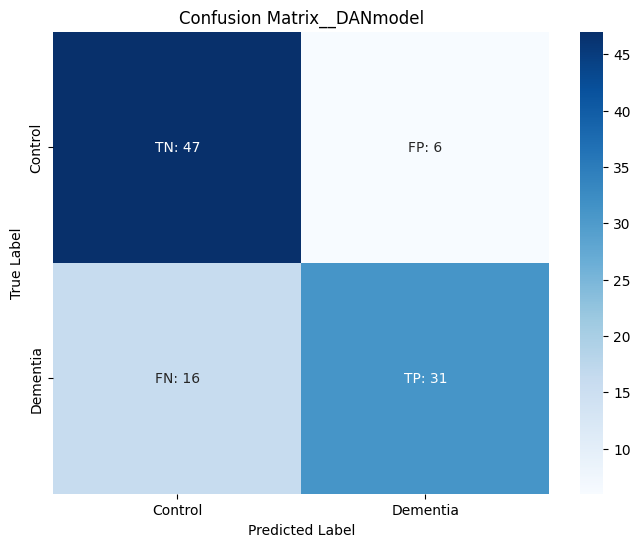

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Save the model
model.save('dan_model.h5')

# Evaluate the model on the test dataset
model = tf.keras.models.load_model('dan_model.h5')
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel()

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Annotate confusion matrix with TP, TN, FP, FN
conf_matrix_annot = [
    [f"TN: {tn}", f"FP: {fp}"],
    [f"FN: {fn}", f"TP: {tp}"]
]
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=conf_matrix_annot, fmt='', cmap='Blues', xticklabels=['Control', 'Dementia'], yticklabels=['Control', 'Dementia'])
plt.title('Confusion Matrix__DANmodel')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

